An Artificial Neural Network (ANN) is an information processing paradigm that is inspired the brain. ANNs, like people, learn by example. An ANN is configured for a specific application, such as pattern recognition or data classification, through a learning process. Learning largely involves adjustments to the synaptic connections that exist between the neurons.

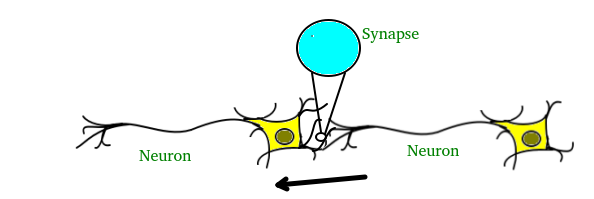

The brain consists of hundreds of billions of cells called neurons. These neurons are connected together by synapses which are nothing but the connections across which a neuron can send an impulse to another neuron. When a neuron sends an excitatory signal to another neuron, then this signal will be added to all of the other inputs of that neuron. If it exceeds a given threshold then it will cause the target neuron to fire an action signal forward — this is how the thinking process works internally.


In Computer Science, we model this process by creating “networks” on a computer using matrices. These networks can be understood as an abstraction of neurons without all the biological complexities taken into account. To keep things simple, we will just model a simple NN, with two layers capable of solving a linear classification problem.


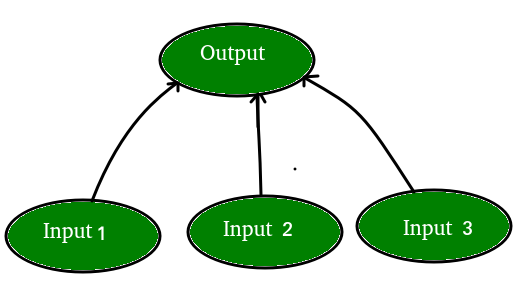

Let’s say we have a problem where we want to predict output given a set of inputs and outputs as training example like so:



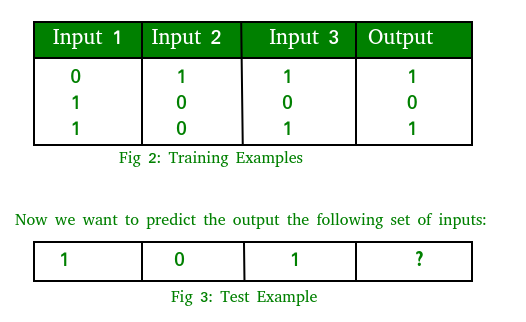

Note that the output is directly related to the third column i.e. the values of input 3 is what the output is in every training example in fig. 2. So for the test example output value should be 1.


The training process consists of the following steps:



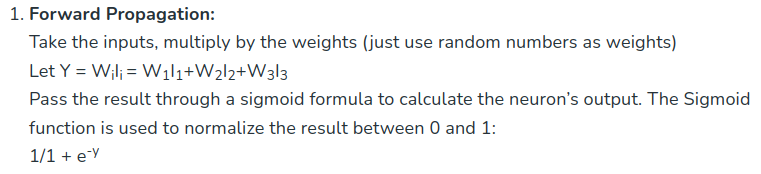

2. Back Propagation
Calculate the error i.e the difference between the actual output and the expected output. Depending on the error, adjust the weights by multiplying the error with the input and again with the gradient of the Sigmoid curve:
Weight += Error Input Output (1-Output) ,here Output (1-Output) is derivative of sigmoid curve.


**Note**: Repeat the whole process for a few thousand iterations.

Let’s code up the whole process in Python. We’ll be using the Numpy library to help us with all the calculations on matrices easily. You’d need to install a numpy library on your system to run the code
Command to install numpy:



```
 sudo apt -get install python-numpy
```



In [4]:
from joblib.numpy_pickle_utils import xrange
from numpy import *


class NeuralNet(object):
    def __init__(self):
        # Generate random numbers
        random.seed(1)

        # Assign random weights to a 3 x 1 matrix,
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # Train the neural network and adjust the weights each time.
    def train(self, inputs, outputs, training_iterations):
        for iteration in xrange(training_iterations):
            # Pass the training set through the network.
            output = self.learn(inputs)

            # Calculate the error
            error = outputs - output

            # Adjust the weights by a factor
            factor = dot(inputs.T, error * self.__sigmoid_derivative(output))
            self.synaptic_weights += factor

        # The neural network thinks.

    def learn(self, inputs):
        return self.__sigmoid(dot(inputs, self.synaptic_weights))


if __name__ == "__main__":
    # Initialize
    neural_network = NeuralNet()

    # The training set.
    inputs = array([[0, 1, 1], [1, 0, 0], [1, 0, 1]])
    outputs = array([[1, 0, 1]]).T

    # Train the neural network
    neural_network.train(inputs, outputs, 10000)

    # Test the neural network with a test example.
    print(neural_network.learn(array([1, 0, 1])))

[0.9897704]


**Expected Output**: After 10 iterations our neural network predicts the value to be 0.65980921.  It looks not good as the answer should really be 1. If we increase the number of iterations to 100, we get 0.87680541. Our network is getting smarter! Subsequently, for 10000 iterations we get 0.9897704 which is pretty close and indeed a satisfactory output.



# **A single neuron neural network in Python**

Neural networks are the core of deep learning, a field that has practical applications in many different areas. Today neural networks are used for image classification, speech recognition, object detection, etc. Now, Let’s try to understand the basic unit behind all these states of art techniques.


A single neuron transforms given input into some output. Depending on the given input and weights assigned to each input, decide whether the neuron fired or not. Let’s assume the neuron has 3 input connections and one output.

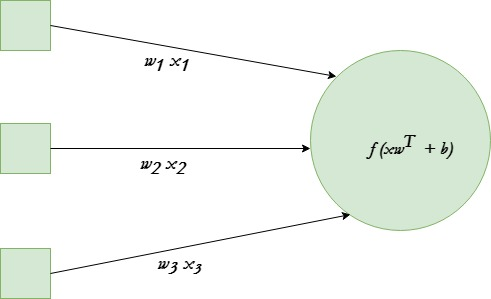

We will be using tanh activation function in a given example.
The end goal is to find the optimal set of weights for this neuron that produces correct results. Do this by training the neuron with several different training examples. At each step calculate the error in the output of the neuron, and backpropagate the gradients. The step of calculating the output of a neuron is called forward propagation while the calculation of gradients is called back propagation.
Below is the implementation :


In [1]:
# Python program to implement a
# single neuron neural network

# import all necessary libraries
from numpy import exp, array, random, dot, tanh

# Class to create a neural
# network with single neuron
class NeuralNetwork():

    def __init__(self):
        # Using seed to make sure it'll
        # generate same weights in every run
        random.seed(1)

        # 3x1 Weight matrix
        self.weight_matrix = 2 * random.random((3, 1)) - 1

    # tanh as activation function
    def tanh(self, x):
        return tanh(x)

    # derivative of tanh function.
    # Needed to calculate the gradients.
    def tanh_derivative(self, x):
        return 1.0 - tanh(x) ** 2

    # forward propagation
    def forward_propagation(self, inputs):
        return self.tanh(dot(inputs, self.weight_matrix))

    # training the neural network.
    def train(self, train_inputs, train_outputs,
                            num_train_iterations):

        # Number of iterations we want to
        # perform for this set of input.
        for iteration in range(num_train_iterations):
            output = self.forward_propagation(train_inputs)

            # Calculate the error in the output.
            error = train_outputs - output

            # multiply the error by input and then
            # by gradient of tanh function to calculate
            # the adjustment needs to be made in weights
            adjustment = dot(train_inputs.T, error *
                             self.tanh_derivative(output))

            # Adjust the weight matrix
            self.weight_matrix += adjustment

# Driver Code
if __name__ == "__main__":

    neural_network = NeuralNetwork()

    print ('Random weights at the start of training')
    print (neural_network.weight_matrix)

    train_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    train_outputs = array([[0, 1, 1, 0]]).T

    neural_network.train(train_inputs, train_outputs, 1)

    print ('New weights after training')
    print (neural_network.weight_matrix)

    # Test the neural network with a new situation.
    print ("Testing network on new examples ->")
    print (neural_network.forward_propagation(array([1, 0, 0])))


Random weights at the start of training
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New weights after training
[[1.95024663]
 [1.96483841]
 [1.96038419]]
Testing network on new examples ->
[0.96033857]
